In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(""), "..")))


In [2]:
from tmac import (
    Machine,
    Model,
    Process,
    Protocol,
    Score,
    TableFormat,
    Technology,
    TrustBoundary,
)  # noqa: E402
from tmac.plus import Database, User  # noqa: E402


> Users must log in to the website before they can carry out any of the use cases.

In [3]:
model = Model("REST API Model")


In [4]:
internet = TrustBoundary(model, "Internet")
dmz = TrustBoundary(model, "DMZ")
intranet = TrustBoundary(model, "Intranet")

In [5]:
user = User(model, "User", trust_boundary=internet)

In [6]:
web_server = Process(
    model,
    "WebServer",
    machine=Machine.VIRTUAL,
    technology=Technology.WEB_APPLICATION,
    trust_boundary=dmz,
)

database = Database(
    model,
    "Database",
    machine=Machine.VIRTUAL,
    trust_boundary=intranet,
)

In [7]:
web_traffic = user.add_data_flow(
    "WebTraffic",
    destination=web_server,
    protocol=Protocol.HTTPS,
)

web_traffic.transfers(
    "UserCredentials",
    confidentiality=Score.HIGH,
    integrity=Score.HIGH,
    availability=Score.HIGH,
)


In [8]:
database_traffic = web_server.add_data_flow(
    "DatabaseTraffic",
    destination=database,
    protocol=Protocol.SQL,
)

database_traffic.transfers(
    "UserDetails",
    confidentiality=Score.HIGH,
    integrity=Score.HIGH,
    availability=Score.HIGH,
)

In [9]:
print(model.create_risks_table())


ID                                  Category                 Risk
----------------------------------  -----------------------  -----------------------------------------------------------------------------
CAPEC-63@WebServer                  Inject Unexpected Items  Cross-Site Scripting (XSS) risk at WebServer
CAPEC-66@WebServer@DatabaseTraffic  Inject Unexpected Items  SQL Injection risk at WebServer against database Database via DatabaseTraffic


In [10]:
print(model.create_backlog_table())

ID                                             Category              User Story
---------------------------------------------  --------------------  ----------------------------------------------------------------------------------------------------
ASVS-5.1.3@CAPEC-63@WebServer                  Input Validation      Verify that all input (HTML form fields, REST requests, URL parameters, HTTP headers, cookies, batch
                                                                     files, RSS feeds, etc) is validated using positive validation (allow lists).
ASVS-5.3.4@CAPEC-66@WebServer@DatabaseTraffic  Output Encoding and   Verify that data selection or database queries (e.g. SQL, HQL, ORM, NoSQL) use parameterized
                                               Injection Prevention  queries, ORMs, entity frameworks, or are otherwise protected from database injection attacks.
ASVS-13.3.1@CAPEC-63@WebServer                 SOAP Web Service      Verify that XSD schema validation takes 

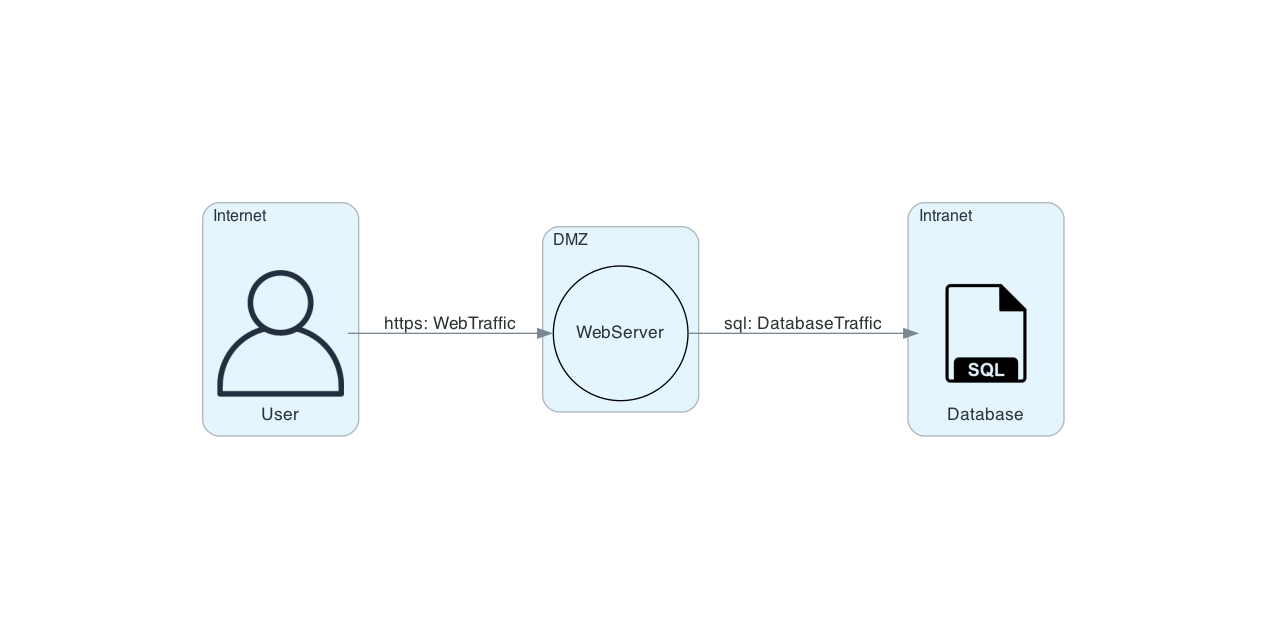

In [11]:
model.create_data_flow_diagram()
